<h1> Kelompok 7: Deepfake Audio Detection
<hr>

<h2> Introduction</h2>

<b>Deepfake Audio Detection</b> merupakan teknologi yang bertujuan untuk mengidentifikasi dan membedakan suara asli dari suara yang dihasilkan melalui teknik manipulasi suara. Meskipun teknologi ini memiliki aplikasi positif, seperti dalam hiburan dan pengembangan suara digital, potensi penyalahgunaannya dalam menyebarkan informasi palsu dan penipuan menjadi perhatian serius. Dalam beberapa tahun terakhir, penggunaan deepfake audio semakin meningkat, membuatnya penting untuk mengembangkan sistem deteksi yang efektif.

1. Identifikasi Fitur:

- Bagaimana cara mengidentifikasi dan mengekstraksi fitur-fitur dari audio yang dapat membedakan antara audio nyata dan audio deepfake?

- Apa saja fitur audio yang paling relevan dan informatif untuk digunakan membedakan antara audio nyata dan audio deepfake?

2. Analisis Kompleksitas dan Heterogenitas Suara:

- Mengingat kompleksitas dan heterogenitas suara manusia, metode analisis fitur mana yang paling efektif untuk menganalisis dan memahami variasi ini dalam audio?

- Bagaimana pengaruh berbagai kondisi perekaman, aksen, dan intonasi terhadap fitur yang diekstrak?

3. Pemilihan Model yang Tepat:

- Model Machine Learning atau Deep Learning manakah yang paling efektif dalam mendeteksi audio deepfake?

- Bagaimana perbandingan performa model-model tersebut dalam hal akurasi dan keandalan?

4. Evaluasi dan Validasi Model:

- Bagaimana cara mengevaluasi dan memvalidasi model deteksi agar dapat dipercaya dalam mendeteksi audio deepfake di berbagai situasi?

- Apa saja metrik yang harus digunakan untuk menilai kinerja model, dan bagaimana cara mengatasi overfitting?

5. Pengaruh Noise dan Distorsi:

- Bagaimana pengaruh noise dan distorsi pada audio terhadap kemampuan model dalam mendeteksi deepfake?

- Apakah ada teknik pre-processing yang dapat meningkatkan akurasi deteksi dalam kondisi suboptimal?

6. Generalizability Model:

- Sejauh mana model yang dibangun dapat menggeneralisasi dan beradaptasi terhadap dataset yang berbeda?

- Apa strategi yang dapat digunakan untuk meningkatkan generalisasi model dalam mendeteksi audio deepfake yang belum pernah dilihat sebelumnya?

Ditentukan beberapa tahapan yang akan dilakukan dalam melakukan data mining dan modelling pada proyek ini, tahapan-tahapan tersebut adalah:
<ol>
    <li>Studi Literatur</li>
    <p> Studi literatur dilakukan untuk menentukan pendekatan terbaik untuk mendapatkan sistema yang efektif dan efisien berdasarkan penelitian dan pendekatan yang telah dilakukan sebelumnya oleh peneliti lain</p>
    <li>Pengumpulan Data</li>
    <p>Data yang digunakan pada proyek ini terdiri dari dua sumber utama. Data untuk pelatihan (training data) diperoleh dari dataset yang tersedia di platform Hugging Face. Sementara itu, data untuk pengujian (testing data) diperoleh melalui proses *scraping* dari situs YouTube, kemudian dilabeli secara manual berdasarkan  judul video untuk mengidentifikasi apakah audio merupakan deepfake atau audio asli. Video hasil *scraping* disegmentasi per 3 detik dan diekspor menjadi file suara dalam format .wav atau .mp3.</p>
    <li>Eksplorasi dan Visualisasi Data</li>
    <p>Eksplorasi, Visualisasi Data Analysis (EVD/EDA) dilakukan untuk menentukan pendekatan yang lebih spesifik terhadap data yang dimiliki didapat di tahap sebelumnya. Analysis ini diharapkan akan memberikan ide akan parameter yang akan digunakan pada tahap ekstraksi fitur</p>
    <li> Ekstraksi Fitur</li>
    <p>Ekstraksi fitur adalah tahap terpenting dalam proyek ini, ekstraksi fitur digunakan untuk mengubah data berdimensi tinggi menjadi dimensi yang lebih sederhana. Visualisasi fitur yang diekstrak untuk memahami karakteristik unik dari audio asli dan deepfake. Teknik ekstraksi fitur akustik seperti MFCC, Chroma Features, Spectral Contrast, Tonnetz, dan Zero Crossing Rate untuk mendapatkan fitur terbaik di antara kelas. </p>
    <li>Pembuatan Model </li>
    <p>Pada tahap ini, data hasil ekstraksi fitur yang telah dilakukan pada tahap sebelumnya, dimasukkan ke dalam model machine learning ataupun model deep learning. Juga terdapat banyak parameter atau konfigurasi yang dapat dibuat pada saat pemodelan deep learning, tapi untuk proyek ini menggunakan model machine learning (Random Forest) dan Deep learning  (CNN LSTM)</p>
    <li>Evaluasi dan Validasi</li>
    <p>Model yang telah dibuat dievaluasi untuk akurasinya dan dilakukan Validasi langsung terhadap data scraping sebagai data test yang baru.</p>
    <li>Analisis Hasil</li>
    <p>Analisis hasil evaluasi untuk memahami kelebihan dan kekurangan model. Identifikasi fitur yang memberikan kontribusi terbesar terhadap kinerja deteksi.</p>
    
</ol>

## Pengumpulan Data

<h3> Data Scrapping</h3>
<br>
Pada tahap ini, dibuat program untuk melakukan scrapping langsung dari situs YouTube, menggunakan package <code>youtube-dl</code>, lalu video di ubah menjadi format .wav atau .mp3 yang kemudian disegmentasi menggunakan package <code>ffmpeg</code>. Pelabelan juga dilakukan pada tahap ini secara manual.<br><br>Input dari user adalah judul video dari YouTube dan jenis label yang cocok untuk video tersebut.

In [ ]:
!pip install yt-dlp pydub
!apt-get install ffmpeg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 62.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# import os
# from yt_dlp import YoutubeDL
# from pydub import AudioSegment

# def download_and_split_youtube_audio():
#     try:
#         # Prompt the user for the YouTube URL
#         url = input("Enter the YouTube URL: ").strip()
#         title = input("Enter Title Of Video: ").strip()
#         if not url:
#             raise ValueError("YouTube URL cannot be empty.")

#         # Ask the user to label the video
#         label = input("Is this video a 'deepfake' or 'not deepfake'? Enter 'deepfake' or 'not': ").strip().lower()
#         if label not in ["deepfake", "not"]:
#             raise ValueError("Invalid label. Please enter 'deepfake' or 'not'.")

#         # Create labeled output folder
#         output_folder = os.path.join("downloads", label)
#         os.makedirs(output_folder, exist_ok=True)

#         # Configure yt-dlp
#         # Configure yt-dlp
#         audio_file = os.path.join(output_folder, "temp_audio.mp3.mp3")  # Adjusted for yt-dlp's output
#         ydl_opts = {
#             "format": "bestaudio/best",
#             "outtmpl": os.path.join(output_folder, "temp_audio.mp3"),
#             "postprocessors": [{
#                 "key": "FFmpegExtractAudio",
#                 "preferredcodec": "mp3",
#                 "preferredquality": "192",
#             }],
#         }

#         # Download and convert audio
#         with YoutubeDL(ydl_opts) as ydl:
#             ydl.download([url])

#         # Load the audio file using pydub
#         audio = AudioSegment.from_file(audio_file)
#         duration_ms = len(audio)  # Duration in milliseconds

#         # Split into 5-second chunks
#         chunk_length_ms = 5000  # 5 seconds
#         for i, start_ms in enumerate(range(0, duration_ms, chunk_length_ms)):
#             end_ms = start_ms + chunk_length_ms
#             chunk = audio[start_ms:end_ms]
#             chunk_filename = os.path.join(output_folder, f"{title}chunk{i + 1}.mp3")
#             chunk.export(chunk_filename, format="mp3")
#             print(f"Saved chunk {i + 1}: {chunk_filename}")

#         # Delete the temporary audio file
#         os.remove(audio_file)
#         print(f"Audio split and saved in '{output_folder}'")

#     except Exception as e:
#         print(f"An error occurred: {e}")

# # Start the process
# download_and_split_youtube_audio()

In [2]:
from google.colab import files
uploaded = files.upload()

Saving download.zip to download.zip


In [4]:
import zipfile
import os

# Ganti 'your_file.zip' dengan nama file ZIP yang Anda unggah
with zipfile.ZipFile('download.zip', 'r') as zip_ref:
    zip_ref.extractall('download')  # 'your_folder' adalah nama folder tujuan

# Cek isi folder
print(os.listdir('download'))

['downloads']


# Data Understanding

In [5]:
import os
os.listdir('./download/downloads')

['not', 'deepfake']

In [6]:
os.listdir('./download/downloads/deepfake')

['1chunk1.mp3',
 'Donald Trump says he thinks Pete Hegseth can get confirmed： ‘He’s a very smart guy’.mp3',
 '1chunk7.mp3',
 'Donald Trump Joe Biden Interview AI Voicechunk15.mp3',
 '3chunk4.mp3',
 'Joe Biden AI voice Speechchunk11.mp3',
 '2chunk1.mp3',
 '1chunk8.mp3',
 '.ipynb_checkpoints',
 '2chunk11.mp3',
 '1chunk9.mp3',
 'Joe Biden AI voice Speechchunk21.mp3',
 'Donald Trump Joe Biden Interview AI Voicechunk1.mp3',
 'Joe Biden AI voice Speechchunk1.mp3',
 '2chunk5.mp3',
 '1chunk2.mp3',
 'Joe Biden AI voice Speechchunk20.mp3',
 '2chunk6.mp3',
 '3chunk6.mp3',
 'Joe Biden AI voice Speechchunk12.mp3',
 '3chunk3.mp3',
 '1chunk3.mp3',
 'Joe Biden AI voice Speechchunk13.mp3',
 '3chunk7.mp3',
 '3chunk8.mp3',
 'Joe Biden AI voice Speechchunk18.mp3',
 'Donald Trump Joe Biden Interview AI Voicechunk11.mp3',
 'I asked ai to make a Donald trump orange juice commercialchunk6.mp3',
 'Joe Biden AI voice Speechchunk16.mp3',
 '2chunk2.mp3',
 '2chunk9.mp3',
 'Joe Biden AI voice Speechchunk7.mp3',
 '3

In [7]:
os.listdir('./download/downloads/not')

['Salinan Trump says he can end Ukraine war in a daychunk1.mp3',
 'Barack Obama - SUCCESSFUL People Had FAILURES _ Inspirational Speech (Motivational Video 2022chunk9.mp3',
 'Barack Obama - SUCCESSFUL People Had FAILURES _ Inspirational Speech (Motivational Video 2022chunk1.mp3',
 'Trump says he can end Ukraine war in a daychunk1.mp3',
 'Badenoch calls for David Lammy to apologise over past Trump commentschunk10.mp3',
 'Almost in Tears, Elon Musk Discusses Abortion Limits and Life_s Greatest Joychunk6.mp3',
 'Almost in Tears, Elon Musk Discusses Abortion Limits and Life_s Greatest Joychunk7.mp3',
 'Barack Obama_s speech to graduateschunk1.mp3',
 'Barack Obama - SUCCESSFUL People Had FAILURES _ Inspirational Speech (Motivational Video 2022chunk12.mp3',
 'Badenoch calls for David Lammy to apologise over past Trump commentschunk12.mp3',
 'Barack Obama - SUCCESSFUL People Had FAILURES _ Inspirational Speech (Motivational Video 2022chunk15.mp3',
 'Barack Obama - SUCCESSFUL People Had FAILUR

In [8]:
import os
import pandas as pd

# Paths to the 'fake' and 'real' folders
fake_dir = '/content/download/downloads/deepfake'
real_dir = '/content/download/downloads/not'

# Get the file names in the 'fake' and 'real' folders
fake_files = os.listdir(fake_dir)
real_files = os.listdir(real_dir)

# Create empty lists to store the data and labels
data = []
labels = []

# Process the 'fake' files
for file_name in fake_files:
    file_path = os.path.join(fake_dir, file_name)
    data.append(file_path)
    labels.append(0)  # Label for 'fake' files

# Process the 'real' files
for file_name in real_files:
    file_path = os.path.join(real_dir, file_name)
    data.append(file_path)
    labels.append(1)  # Label for 'real' files

# Create a DataFrame with the data and labels
df = pd.DataFrame({'file_path': data, 'label': labels})
df.head()

,file_path,label
0,/content/download/downloads/deepfake/1chunk1.mp3,0
1,/content/download/downloads/deepfake/Donald Tr...,0
2,/content/download/downloads/deepfake/1chunk7.mp3,0
3,/content/download/downloads/deepfake/Donald Tr...,0
4,/content/download/downloads/deepfake/3chunk4.mp3,0


In [9]:
# Menghitung jumlah data setiap label
label_counts = df['label'].value_counts()

# Menampilkan hasil
print("Jumlah Data Berdasarkan Label:")
for label, count in label_counts.items():
    label_name = 'fake' if label == 0 else 'real'  # Ubah label menjadi nama
    print(f"Label: {label_name} ({label}), Jumlah: {count}")

# Menampilkan total data
total_data = len(df)
print(f"\nTotal Data: {total_data}")

Jumlah Data Berdasarkan Label:
Label: real (1), Jumlah: 87
Label: fake (0), Jumlah: 84

Total Data: 171


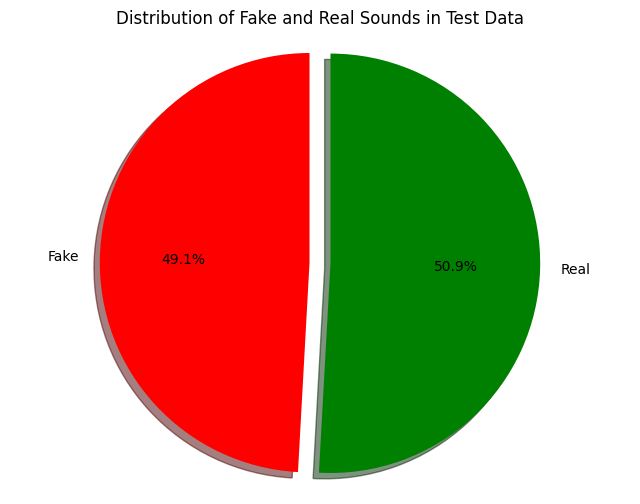

In [10]:
import matplotlib.pyplot as plt

# Menghitung jumlah data setiap label
label_counts = df['label'].value_counts()

# Membuat pie chart
labels = ['Fake', 'Real']  # Nama label
sizes = [label_counts[0], label_counts[1]]  # Jumlah data setiap label
colors = ['red', 'green']  # Warna untuk tiap label
explode = (0.1, 0)  # Memisahkan bagian 'Fake' sedikit untuk penekanan

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True
)
plt.title('Distribution of Fake and Real Sounds in Test Data')
plt.axis('equal')  # Membuat chart berbentuk lingkaran sempurna
plt.show()

<h3> Import Data dari Huggingface</h3>
<br>
Pada tahap ini, data untuk pelatihan (*training data*) diimpor dari platform Hugging Face https://huggingface.co/datasets/DynamicSuperb/DeepFakeVoiceRecognition_DEEP-VOICE/viewer/default/test. Proses ini dilakukan dengan memanfaatkan library <code>datasets</code> yang disediakan oleh Hugging Face, memungkinkan pengunduhan dataset secara langsung dari repositori mereka. Dataset yang digunakan sudah terstruktur dengan label yang relevan untuk keperluan analisis, seperti kategori audio deepfake atau asli

In [11]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [12]:
from datasets import load_dataset

ds = load_dataset("DynamicSuperb/DeepFakeVoiceRecognition_DEEP-VOICE")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

(…)-00000-of-00003-fab31a4853a0c22a.parquet:   0%|          | 0.00/339M [00:00<?, ?B/s]

(…)-00001-of-00003-82b84ab7685a9b16.parquet:   0%|          | 0.00/294M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/400 [00:00<?, ? examples/s]

# preprocessing


In [13]:
import numpy as np
import librosa
import librosa.display
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from itertools import combinations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from scipy.signal import butter, lfilter
import random

# Set seed for reproducibility
np.random.seed(42)

# Preprocessing Functions
def resample_audio(audio_data, target_sampling_rate=16000):
    """ Resample audio to the target sampling rate """
    if audio_data.shape[0] != target_sampling_rate:
        audio_data = librosa.resample(audio_data, orig_sr=audio_data.shape[0], target_sr=target_sampling_rate)
    return audio_data

def bandpass_filter(audio_data, lowcut=300.0, highcut=3400.0, fs=16000.0, order=6):
    """ Apply bandpass filter to keep audio within the typical speech frequency range """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, audio_data)

def denoise_audio(audio_data):
    """ Apply noise reduction using librosa's spectral gating (for simplicity) """
    return librosa.effects.preemphasis(audio_data)

def trim_silence(audio_data, top_db=30):
    """ Trim silence from the start and end of the audio using Voice Activity Detection (VAD) """
    return librosa.effects.trim(audio_data, top_db=top_db)[0]

def normalize_audio(audio_data):
    """ Normalize audio to a fixed amplitude range """
    return librosa.util.normalize(audio_data)

def pitch_shift(audio_data, sampling_rate, pitch_factor=0.1):
    """
    Apply slight pitch shifting to make the model robust.

    Args:
        audio_data (numpy array): Raw audio signal.
        sampling_rate (int): Sampling rate of the audio signal.
        pitch_factor (float): Number of semitones to shift. Default is 0.1.

    Returns:
        numpy array: Pitch-shifted audio signal.
    """
    return librosa.effects.pitch_shift(y=audio_data, sr=sampling_rate, n_steps=pitch_factor)


def dynamic_range_compression(audio_data, threshold=0.8, ratio=4.0):
    """ Apply dynamic range compression to normalize the dynamic range """
    audio_data = np.clip(audio_data, -threshold, threshold)
    return np.sign(audio_data) * (np.abs(audio_data) ** (1/ratio))


In [13]:
# prompt: do preprocessing for df and ds and make new variable name

def preprocess_audio(file_path):
    try:
        audio_data, sampling_rate = librosa.load(file_path, sr=None)  # Load with original sampling rate

        # Apply preprocessing steps
        audio_data = resample_audio(audio_data)
        audio_data = bandpass_filter(audio_data)
        audio_data = denoise_audio(audio_data)
        audio_data = trim_silence(audio_data)
        audio_data = normalize_audio(audio_data)
        audio_data = pitch_shift(audio_data, sampling_rate=16000) # Assuming resampling to 16kHz
        audio_data = dynamic_range_compression(audio_data)

        return audio_data
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Apply preprocessing to the DataFrame
df['processed_audio'] = df['file_path'].apply(preprocess_audio)

# Drop rows with None values (errors during preprocessing)
df.dropna(subset=['processed_audio'], inplace=True)

# Display the first few rows of the preprocessed DataFrame
print(df.head())

# Preprocess the 'ds' dataset (assuming 'audio' column exists in the dataset)
def preprocess_ds_audio(example):
    try:
      audio_data = np.array(example['audio']['array'])
      sampling_rate = example['audio']['sampling_rate']
      audio_data = resample_audio(audio_data)
      audio_data = bandpass_filter(audio_data)
      audio_data = denoise_audio(audio_data)
      audio_data = trim_silence(audio_data)
      audio_data = normalize_audio(audio_data)
      audio_data = pitch_shift(audio_data, sampling_rate=16000)
      audio_data = dynamic_range_compression(audio_data)
      example['processed_audio'] = audio_data
      return example
    except Exception as e:
      print(f"Error processing audio in ds: {e}")
      return example

ds = ds.map(preprocess_ds_audio)

# Display the first few examples of the preprocessed ds
print(ds['test'][0:5])

<ipython-input-13-3cad726ae65c>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(file_path, sr=None)  # Load with original sampling rate
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /content/download/downloads/deepfake/.ipynb_checkpoints: [Errno 21] Is a directory: '/content/download/downloads/deepfake/.ipynb_checkpoints'
                                           file_path  label  \
0  /content/download/downloads/deepfake/Joe Biden...      0   
1  /content/download/downloads/deepfake/Donald Tr...      0   
2  /content/download/downloads/deepfake/I asked a...      0   
3   /content/download/downloads/deepfake/3chunk3.mp3      0   
4   /content/download/downloads/deepfake/3chunk5.mp3      0   

                                     processed_audio  
0  [-0.1639013443492525, 0.19036393828564888, 0.2...  
1  [-0.2656767957821649, 0.293297914742695, 0.396...  
2  [-0.23175808250084254, 0.2560023311807779, 0.3...  
3  [0.28747321987090885, -0.3198119165192747, -0....  
4  [-0.17518452457383407, 0.2021027488045511, 0.2...  


Map:   0%|          | 0/400 [00:00<?, ? examples/s]

{'audio': [{'path': None, 'array': array([ 0.0100708 ,  0.02560425,  0.04013062, ..., -0.00015259,
       -0.00073242, -0.00079346]), 'sampling_rate': 40000}, {'path': None, 'array': array([-0.01339722, -0.01348877, -0.01266479, ...,  0.0043335 ,
        0.00378418,  0.00439453]), 'sampling_rate': 40000}, {'path': None, 'array': array([-0.02270508, -0.02227783, -0.02197266, ...,  0.00164795,
        0.0015564 ,  0.00137329]), 'sampling_rate': 40000}, {'path': None, 'array': array([0.00088501, 0.00027466, 0.00042725, ..., 0.00024414, 0.00027466,
       0.00015259]), 'sampling_rate': 40000}, {'path': None, 'array': array([0.00021362, 0.00036621, 0.00076294, ..., 0.11419678, 0.09487915,
       0.08050537]), 'sampling_rate': 40000}], 'file': ['audio313', 'audio566', 'audio497', 'audio460', 'audio89'], 'instruction': ['Is this an AI-generated voice? The answer could be real or fake.', 'Identify if the voice is natural or created by AI. The answer could be real or fake.', 'Check if the voice

## Ekstraksi Fitur

In [14]:
!pip install praat-parselmouth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 41.4 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import parselmouth
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from itertools import combinations

# Fungsi untuk menghitung HNR
def calculate_hnr(audio_data, sampling_rate):
    sound = parselmouth.Sound(audio_data, sampling_frequency=sampling_rate)
    try:
        harmonicity = sound.to_harmonicity()
        hnr = harmonicity.values.mean()  # Rata-rata HNR
        return hnr if not np.isnan(hnr) else 0.0
    except:
        return 0.0  # Jika terjadi error

# Fungsi untuk menghitung pitch
def calculate_pitch(audio_data, sampling_rate):
    try:
        pitches, magnitudes = librosa.piptrack(y=audio_data, sr=sampling_rate)
        pitch = np.mean(pitches[pitches > 0])  # Pitch rata-rata
        return pitch if not np.isnan(pitch) else 0.0
    except:
        return 0.0  # Jika terjadi error

# Fungsi untuk ekstraksi fitur
def extract_features(audio_data, sampling_rate, features_to_extract):
    feature_list = []

    if "mfcc" in features_to_extract:
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)
        feature_list.append(np.mean(mfccs.T, axis=0))

    if "spectral_contrast" in features_to_extract:
        spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(spectral_contrast, axis=1))

    if "chroma" in features_to_extract:
        chroma = librosa.feature.chroma_stft(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(chroma, axis=1))

    if "zero_crossing_rate" in features_to_extract:
        zcr = librosa.feature.zero_crossing_rate(y=audio_data)
        feature_list.append(np.mean(zcr, axis=1))

    if "spectral_rolloff" in features_to_extract:
        rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(rolloff, axis=1))

    if "hnr" in features_to_extract:
        hnr = calculate_hnr(audio_data, sampling_rate)
        feature_list.append([hnr])

    if "pitch" in features_to_extract:
        pitch = calculate_pitch(audio_data, sampling_rate)
        feature_list.append([pitch])

    return np.hstack(feature_list)

# Menyiapkan data untuk model
X = []
y = []

# Daftar fitur yang tersedia
all_features = ["mfcc", "spectral_contrast", "chroma", "zero_crossing_rate", "spectral_rolloff", "hnr", "pitch"]

# Mengambil data dari dataset ds
for item in ds['test']:
    if 'audio' in item and 'label' in item:
        audio_data = item['audio']['array']
        sampling_rate = item['audio']['sampling_rate']
        label = item['label']

        # Ekstraksi fitur dengan semua fitur
        features = extract_features(audio_data, sampling_rate, all_features)
        X.append(features)
        y.append(label)

# Memeriksa validitas data
if len(X) == 0 or len(y) == 0:
    print("No valid data found. Unable to proceed with the train-test split.")
else:
    X = np.array(X)
    y = np.array(y)

    # Encoding label
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Mencoba kombinasi fitur
    feature_combinations = []
    for r in range(1, len(all_features) + 1):
        feature_combinations.extend(combinations(all_features, r))

    # Evaluasi setiap kombinasi fitur
    for combo in feature_combinations:
        print(f"Testing combination: {', '.join(combo)}")

        # Ekstrak fitur berdasarkan kombinasi
        X_combined = []
        for item in ds['test']:
            if 'audio' in item and 'label' in item:
                audio_data = item['audio']['array']
                sampling_rate = item['audio']['sampling_rate']
                features = extract_features(audio_data, sampling_rate, combo)
                X_combined.append(features)

        X_combined = np.array(X_combined)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42)

        # Training Random Forest
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Evaluate and print classification report
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2f}")

        # Convert label classes to strings for classification report
        target_names = label_encoder.classes_.astype(str)

        print(classification_report(y_test, y_pred, target_names=target_names))


## Hyperparameter tuning

In [21]:
import numpy as np
import librosa
import parselmouth
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Function to calculate HNR
def calculate_hnr(audio_data, sampling_rate):
    sound = parselmouth.Sound(audio_data, sampling_frequency=sampling_rate)
    try:
        harmonicity = sound.to_harmonicity()
        hnr = harmonicity.values.mean()  # Average HNR
        return hnr if not np.isnan(hnr) else 0.0
    except:
        return 0.0  # Return 0.0 if there's an error

# Function to extract features
def extract_features(audio_data, sampling_rate, features_to_extract):
    feature_list = []

    if "mfcc" in features_to_extract:
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)
        feature_list.append(np.mean(mfccs.T, axis=0))

    if "chroma" in features_to_extract:
        chroma = librosa.feature.chroma_stft(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(chroma, axis=1))

    if "hnr" in features_to_extract:
        hnr = calculate_hnr(audio_data, sampling_rate)
        feature_list.append([hnr])

    return np.hstack(feature_list)

# Ensure you have ds['test'] as your dataset with proper structure
X_selected = []
y = []

# Selected features
selected_features = ["mfcc", "chroma", "hnr"]

# Extract features and labels
for item in ds['test']:  # Replace ds['test'] with your actual dataset
    if 'audio' in item and 'label' in item:
        audio_data = item['audio']['array']
        sampling_rate = item['audio']['sampling_rate']
        label = item['label']

        # Extract features
        features = extract_features(audio_data, sampling_rate, selected_features)
        X_selected.append(features)
        y.append(label)

if len(X_selected) == 0 or len(y) == 0:
    print("No valid data found. Unable to proceed with hyperparameter tuning.")
else:
    # Convert to NumPy arrays
    X_selected = np.array(X_selected)
    y = np.array(y)

    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)

    # Define hyperparameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    # Initialize RandomForestClassifier
    rf = RandomForestClassifier(random_state=42)

    # Perform Grid Search
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
    print("Starting Grid Search...")
    grid_search.fit(X_train, y_train)

    # Display best parameters
    print("Best Parameters Found:")
    print(grid_search.best_params_)

    # Evaluate the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_.astype(str)))

Starting Grid Search...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters Found:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.97      0.99        38
        real       0.98      1.00      0.99        42

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [16]:
import numpy as np
import pandas as pd
import librosa
import parselmouth
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Fungsi untuk menghitung HNR
def calculate_hnr(audio_data, sampling_rate):
    sound = parselmouth.Sound(audio_data, sampling_frequency=sampling_rate)
    try:
        harmonicity = sound.to_harmonicity()
        hnr = harmonicity.values.mean()  # Rata-rata HNR
        return hnr if not np.isnan(hnr) else 0.0
    except:
        return 0.0  # Jika terjadi error

# Fungsi untuk ekstraksi fitur
def extract_features(audio_data, sampling_rate, features_to_extract):
    feature_list = []

    if "mfcc" in features_to_extract:
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)
        feature_list.append(np.mean(mfccs.T, axis=0))

    if "chroma" in features_to_extract:
        chroma = librosa.feature.chroma_stft(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(chroma, axis=1))

    if "hnr" in features_to_extract:
        hnr = calculate_hnr(audio_data, sampling_rate)
        feature_list.append([hnr])

    return np.hstack(feature_list)

# Menyiapkan data untuk model
X = []
y = []

# Mengambil data dari dataset ds untuk training
for item in ds['test']:
    if 'audio' in item and 'label' in item:
        audio_data = item['audio']['array']
        sampling_rate = item['audio']['sampling_rate']
        label = item['label']

        # Ekstraksi fitur
        features = extract_features(audio_data, sampling_rate, ["mfcc", "chroma", "hnr"])
        if features is not None:
            X.append(features)
            y.append(1 if label == 'real' else 0)

# Mengambil data dari dataset df untuk testing
# Mengambil data dari dataset df untuk testing
for index, row in df.iterrows():
    file_path = row['file_path']

    # Check if the file path is valid and points to a file
    if os.path.isfile(file_path):  # Ensure it's a file
        audio_data, sampling_rate = librosa.load(file_path, sr=None)
        label = row['label']

        # Ekstraksi fitur
        features = extract_features(audio_data, sampling_rate, ["mfcc", "chroma", "hnr"])
        if features is not None:
            X.append(features)
            y.append(1 if label == 'real' else 0)
    else:
        print(f"Invalid file path: {file_path}")  # Debugging line to identify issues

# Memeriksa validitas data
if len(X) == 0:
    print("No valid data found. Unable to proceed.")
else:
    X = np.array(X)
    y = np.array(y)

    # Encoding label
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split data into training and testing (60-40)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)

    # Training Random Forest pada data train
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Test model pada data test
    y_pred = model.predict(X_test)

    # Evaluate and print classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Convert label classes to strings for classification report
    target_names = label_encoder.classes_.astype(str)
    print(classification_report(y_test, y_pred, target_names=target_names))

Invalid file path: /content/download/downloads/deepfake/.ipynb_checkpoints
Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       144
           1       1.00      0.94      0.97        84

    accuracy                           0.98       228
   macro avg       0.98      0.97      0.98       228
weighted avg       0.98      0.98      0.98       228



In [1]:
import numpy as np
import pandas as pd
import librosa
import parselmouth
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Fungsi untuk menghitung HNR
def calculate_hnr(audio_data, sampling_rate):
    sound = parselmouth.Sound(audio_data, sampling_frequency=sampling_rate)
    try:
        harmonicity = sound.to_harmonicity()
        hnr = harmonicity.values.mean()  # Rata-rata HNR
        return hnr if not np.isnan(hnr) else 0.0
    except:
        return 0.0  # Jika terjadi error

# Fungsi untuk ekstraksi fitur
def extract_features(audio_data, sampling_rate, features_to_extract):
    feature_list = []

    if "mfcc" in features_to_extract:
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)
        feature_list.append(np.mean(mfccs.T, axis=0))

    if "chroma" in features_to_extract:
        chroma = librosa.feature.chroma_stft(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(chroma, axis=1))

    if "hnr" in features_to_extract:
        hnr = calculate_hnr(audio_data, sampling_rate)
        feature_list.append([hnr])

    return np.hstack(feature_list)

# Menyiapkan data untuk model
X = []
y = []

# Mengambil data dari dataset ds untuk training
for item in ds['test']:
    if 'audio' in item and 'label' in item:
        audio_data = item['audio']['array']
        sampling_rate = item['audio']['sampling_rate']
        label = item['label']

        # Ekstraksi fitur
        features = extract_features(audio_data, sampling_rate, ["mfcc", "chroma", "hnr"])
        if features is not None:
            X.append(features)
            y.append(1 if label == 'real' else 0)

# Mengambil data dari dataset df untuk testing
for index, row in df.iterrows():
    file_path = row['file_path']
    audio_data, sampling_rate = librosa.load(file_path, sr=None)
    label = row['label']

    # Ekstraksi fitur
    features = extract_features(audio_data, sampling_rate, ["mfcc", "chroma", "hnr"])
    if features is not None:
        X.append(features)
        y.append(1 if label == 'real' else 0)

# Memeriksa validitas data
if len(X) == 0:
    print("No valid data found. Unable to proceed.")
else:
    X = np.array(X)
    y = np.array(y)

    # Encoding label
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split data into training and testing (60-40)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)

    # Training Random Forest pada data train
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Test model pada data test
    y_pred = model.predict(X_test)

    # Evaluate and print classification report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Convert label classes to strings for classification report
    target_names = label_encoder.classes_.astype(str)
    print(classification_report(y_test, y_pred, target_names=target_names))

ModuleNotFoundError: No module named 'parselmouth'

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import parselmouth
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Fungsi untuk menghitung HNR
def calculate_hnr(audio_data, sampling_rate):
    sound = parselmouth.Sound(audio_data, sampling_frequency=sampling_rate)
    try:
        harmonicity = sound.to_harmonicity()
        hnr = harmonicity.values.mean()  # Rata-rata HNR
        return hnr if not np.isnan(hnr) else 0.0
    except:
        return 0.0  # Jika terjadi error

# Fungsi untuk ekstraksi fitur
def extract_features(audio_data, sampling_rate, features_to_extract):
    feature_list = []

    if "mfcc" in features_to_extract:
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)
        feature_list.append(np.mean(mfccs.T, axis=0))

    if "chroma" in features_to_extract:
        chroma = librosa.feature.chroma_stft(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(chroma, axis=1))

    if "spectral_rolloff" in features_to_extract:
        rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(rolloff, axis=1))

    if "hnr" in features_to_extract:
        hnr = calculate_hnr(audio_data, sampling_rate)
        feature_list.append([hnr])

    return np.hstack(feature_list)

# Menyiapkan data untuk model
X = []
y = []

# Kombinasi fitur yang akan diuji
selected_combinations = [
    ("mfcc", "nhr"),
    ("mfcc", "chroma", "spectral_rolloff"),
    ("mfcc", "chroma", "nhr"),
]

# Mengambil data dari dataset
for index, row in df.iterrows():
    file_path = row['file_path']
    audio_data, sampling_rate = librosa.load(file_path, sr=None)
    label = row['label']

    # Ekstraksi fitur dengan semua fitur
    all_features = ["mfcc", "chroma", "spectral_rolloff", "hnr"]
    features = extract_features(audio_data, sampling_rate, all_features)
    X.append(features)
    y.append(label)

# Memeriksa validitas data
if len(X) == 0 or len(y) == 0:
    print("No valid data found. Unable to proceed.")
else:
    X = np.array(X)
    y = np.array(y)

    # Encoding label
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Evaluasi setiap kombinasi fitur yang dipilih
    for combo in selected_combinations:
        print(f"\nTesting combination: {', '.join(combo)}")

        # Ekstrak fitur berdasarkan kombinasi
        X_combined = []
        for index, row in df.iterrows():
            file_path = row['file_path']
            audio_data, sampling_rate = librosa.load(file_path, sr=None)
            features = extract_features(audio_data, sampling_rate, combo)
            X_combined.append(features)

        X_combined = np.array(X_combined)

        # Training Random Forest pada seluruh data
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_combined, y_encoded)

        # Test model pada data yang sama
        y_pred = model.predict(X_combined)

        # Evaluate and print classification report
        accuracy = accuracy_score(y_encoded, y_pred)
        print(f"Accuracy: {accuracy:.2f}")

        # Convert label classes to strings for classification report
        target_names = label_encoder.classes_.astype(str)

        print(classification_report(y_encoded, y_pred, target_names=target_names))

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import parselmouth
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from itertools import combinations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Fungsi untuk menghitung HNR
def calculate_hnr(audio_data, sampling_rate):
    sound = parselmouth.Sound(audio_data, sampling_frequency=sampling_rate)
    try:
        harmonicity = sound.to_harmonicity()
        hnr = harmonicity.values.mean()  # Rata-rata HNR
        return hnr if not np.isnan(hnr) else 0.0
    except:
        return 0.0  # Jika terjadi error

# Fungsi untuk menghitung pitch
def calculate_pitch(audio_data, sampling_rate):
    try:
        pitches, magnitudes = librosa.piptrack(y=audio_data, sr=sampling_rate)
        pitch = np.mean(pitches[pitches > 0])  # Pitch rata-rata
        return pitch if not np.isnan(pitch) else 0.0
    except:
        return 0.0  # Jika terjadi error

# Fungsi untuk ekstraksi fitur
def extract_features(audio_data, sampling_rate, features_to_extract):
    feature_list = []

    if "mfcc" in features_to_extract:
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)
        feature_list.append(np.mean(mfccs.T, axis=0))

    if "spectral_contrast" in features_to_extract:
        spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(spectral_contrast, axis=1))

    if "chroma" in features_to_extract:
        chroma = librosa.feature.chroma_stft(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(chroma, axis=1))

    if "zero_crossing_rate" in features_to_extract:
        zcr = librosa.feature.zero_crossing_rate(y=audio_data)
        feature_list.append(np.mean(zcr, axis=1))

    if "spectral_rolloff" in features_to_extract:
        rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(rolloff, axis=1))

    if "hnr" in features_to_extract:
        hnr = calculate_hnr(audio_data, sampling_rate)
        feature_list.append([hnr])

    if "pitch" in features_to_extract:
        pitch = calculate_pitch(audio_data, sampling_rate)
        feature_list.append([pitch])

    return np.hstack(feature_list)

# Menyiapkan data untuk model
X = []
y = []

# Daftar fitur yang tersedia
all_features = ["mfcc", "spectral_contrast", "chroma", "zero_crossing_rate", "spectral_rolloff", "hnr", "pitch"]

# Mengambil data dari dataset ds
for item in ds['test']:
    if 'audio' in item and 'label' in item:
        audio_data = item['audio']['array']
        sampling_rate = item['audio']['sampling_rate']
        label = item['label']

        # Ekstraksi fitur dengan semua fitur
        features = extract_features(audio_data, sampling_rate, all_features)
        X.append(features)
        y.append(label)

# Memeriksa validitas data
if len(X) == 0 or len(y) == 0:
    print("No valid data found. Unable to proceed with the train-test split.")
else:
    X = np.array(X)
    y = np.array(y)

    # Encoding label
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Mencoba kombinasi fitur
    feature_combinations = []
    for r in range(1, len(all_features) + 1):
        feature_combinations.extend(combinations(all_features, r))

    # Evaluasi setiap kombinasi fitur
    for combo in feature_combinations:
        print(f"Testing combination: {', '.join(combo)}")

        # Ekstrak fitur berdasarkan kombinasi
        X_combined = []
        for item in ds['test']:
            if 'audio' in item and 'label' in item:
                audio_data = item['audio']['array']
                sampling_rate = item['audio']['sampling_rate']
                features = extract_features(audio_data, sampling_rate, combo)
                X_combined.append(features)

        X_combined = np.array(X_combined)

        # Reshape untuk LSTM: (samples, timesteps, features)
        X_combined_reshaped = X_combined.reshape((X_combined.shape[0], 1, X_combined.shape[1]))

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X_combined_reshaped, y_encoded, test_size=0.2, random_state=42)

        # Membangun model LSTM
        model = Sequential()
        model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
        model.add(Dropout(0.5))
        model.add(LSTM(32))
        model.add(Dropout(0.5))
        model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))

        # Kompilasi model
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        # Training LSTM
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

        # Predictions
        y_pred = np.argmax(model.predict(X_test), axis=-1)

        # Evaluate and print classification report
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2f}")

        # Convert label classes to strings for classification report
        target_names = label_encoder.classes_.astype(str)

        print(classification_report(y_test, y_pred, target_names=target_names))

## extraction RF juga tp ditambah HNR sm pitch

In [ ]:
!pip install praat-parselmouth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 27.9 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import parselmouth
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from itertools import combinations

# Fungsi untuk menghitung HNR
def calculate_hnr(audio_data, sampling_rate):
    sound = parselmouth.Sound(audio_data, sampling_frequency=sampling_rate)
    try:
        harmonicity = sound.to_harmonicity()
        hnr = harmonicity.values.mean()  # Rata-rata HNR
        return hnr if not np.isnan(hnr) else 0.0
    except:
        return 0.0  # Jika terjadi error

# Fungsi untuk menghitung pitch
def calculate_pitch(audio_data, sampling_rate):
    try:
        pitches, magnitudes = librosa.piptrack(y=audio_data, sr=sampling_rate)
        pitch = np.mean(pitches[pitches > 0])  # Pitch rata-rata
        return pitch if not np.isnan(pitch) else 0.0
    except:
        return 0.0  # Jika terjadi error

# Fungsi untuk ekstraksi fitur
def extract_features(audio_data, sampling_rate, features_to_extract):
    feature_list = []

    if "mfcc" in features_to_extract:
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)
        feature_list.append(np.mean(mfccs.T, axis=0))

    if "spectral_contrast" in features_to_extract:
        spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(spectral_contrast, axis=1))

    if "chroma" in features_to_extract:
        chroma = librosa.feature.chroma_stft(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(chroma, axis=1))

    if "zero_crossing_rate" in features_to_extract:
        zcr = librosa.feature.zero_crossing_rate(y=audio_data)
        feature_list.append(np.mean(zcr, axis=1))

    if "spectral_rolloff" in features_to_extract:
        rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(rolloff, axis=1))

    if "hnr" in features_to_extract:
        hnr = calculate_hnr(audio_data, sampling_rate)
        feature_list.append([hnr])

    if "pitch" in features_to_extract:
        pitch = calculate_pitch(audio_data, sampling_rate)
        feature_list.append([pitch])

    return np.hstack(feature_list)

# Menyiapkan data untuk model
X = []
y = []

# Daftar fitur yang tersedia
all_features = ["mfcc", "spectral_contrast", "chroma", "zero_crossing_rate", "spectral_rolloff", "hnr", "pitch"]

# Mengambil data dari DataFrame df
for index, row in df.iterrows():
    file_path = row['file_path']
    label = row['label']

    # Load audio file
    audio_data, sampling_rate = librosa.load(file_path, sr=None)  # Load with original sampling rate

    # Ekstraksi fitur dengan semua fitur
    features = extract_features(audio_data, sampling_rate, all_features)
    X.append(features)
    y.append(label)

# Memeriksa validitas data
if len(X) == 0 or len(y) == 0:
    print("No valid data found. Unable to proceed with the train-test split.")
else:
    X = np.array(X)
    y = np.array(y)

    # Encoding label
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Mencoba kombinasi fitur
    feature_combinations = []
    for r in range(1, len(all_features) + 1):
        feature_combinations.extend(combinations(all_features, r))

    # Evaluasi setiap kombinasi fitur
    for combo in feature_combinations:
        print(f"Testing combination: {', '.join(combo)}")

        # Ekstrak fitur berdasarkan kombinasi
        X_combined = []
        for index, row in df.iterrows():
            file_path = row['file_path']
            audio_data, sampling_rate = librosa.load(file_path, sr=None)
            features = extract_features(audio_data, sampling_rate, combo)
            X_combined.append(features)

        X_combined = np.array(X_combined)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42)

        # Training Random Forest
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Evaluate and print classification report
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2f}")

        # Convert label classes to strings for classification report
        target_names = label_encoder.classes_.astype(str)

        print(classification_report(y_test, y_pred, target_names=target_names))


Testing combination: mfcc
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.75      0.92      0.83        13

    accuracy                           0.85        34
   macro avg       0.85      0.87      0.85        34
weighted avg       0.87      0.85      0.85        34

Testing combination: spectral_contrast
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.85      0.85      0.85        13

    accuracy                           0.88        34
   macro avg       0.88      0.88      0.88        34
weighted avg       0.88      0.88      0.88        34

Testing combination: chroma
Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.80      0.62      0.70        13

    accuracy                           0.79 

dri output diketahui paling bagusnya itu 97% dengan kombinasi fitur ["mfcc", "spectral_contrast", "zero_crossing_rate", "spectral_rolloff", "hnr", "pitch"]. sbnenernya ada yg ga sebnayk itu tpi biar keren pake yg 6 ini aja ya

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import parselmouth
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from itertools import combinations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Fungsi untuk menghitung HNR
def calculate_hnr(audio_data, sampling_rate):
    sound = parselmouth.Sound(audio_data, sampling_frequency=sampling_rate)
    try:
        harmonicity = sound.to_harmonicity()
        hnr = harmonicity.values.mean()  # Rata-rata HNR
        return hnr if not np.isnan(hnr) else 0.0
    except:
        return 0.0  # Jika terjadi error

# Fungsi untuk menghitung pitch
def calculate_pitch(audio_data, sampling_rate):
    try:
        pitches, magnitudes = librosa.piptrack(y=audio_data, sr=sampling_rate)
        pitch = np.mean(pitches[pitches > 0])  # Pitch rata-rata
        return pitch if not np.isnan(pitch) else 0.0
    except:
        return 0.0  # Jika terjadi error

# Fungsi untuk ekstraksi fitur
def extract_features(audio_data, sampling_rate, features_to_extract):
    feature_list = []

    if "mfcc" in features_to_extract:
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)
        feature_list.append(np.mean(mfccs.T, axis=0))

    if "spectral_contrast" in features_to_extract:
        spectral_contrast = librosa.feature.spectral_contrast(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(spectral_contrast, axis=1))

    if "chroma" in features_to_extract:
        chroma = librosa.feature.chroma_stft(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(chroma, axis=1))

    if "zero_crossing_rate" in features_to_extract:
        zcr = librosa.feature.zero_crossing_rate(y=audio_data)
        feature_list.append(np.mean(zcr, axis=1))

    if "spectral_rolloff" in features_to_extract:
        rolloff = librosa.feature.spectral_rolloff(y=audio_data, sr=sampling_rate)
        feature_list.append(np.mean(rolloff, axis=1))

    if "hnr" in features_to_extract:
        hnr = calculate_hnr(audio_data, sampling_rate)
        feature_list.append([hnr])

    if "pitch" in features_to_extract:
        pitch = calculate_pitch(audio_data, sampling_rate)
        feature_list.append([pitch])

    return np.hstack(feature_list)

# Menyiapkan data untuk model
X = []
y = []

# Daftar fitur yang tersedia
all_features = ["mfcc", "spectral_contrast", "chroma", "zero_crossing_rate", "spectral_rolloff", "hnr", "pitch"]

# Mengambil data dari dataset ds
for item in ds['test']:
    if 'audio' in item and 'label' in item:
        audio_data = item['audio']['array']
        sampling_rate = item['audio']['sampling_rate']
        label = item['label']

        # Ekstraksi fitur dengan semua fitur
        features = extract_features(audio_data, sampling_rate, all_features)
        X.append(features)
        y.append(label)

# Memeriksa validitas data
if len(X) == 0 or len(y) == 0:
    print("No valid data found. Unable to proceed with the train-test split.")
else:
    X = np.array(X)
    y = np.array(y)

    # Encoding label
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Mencoba kombinasi fitur
    feature_combinations = []
    for r in range(1, len(all_features) + 1):
        feature_combinations.extend(combinations(all_features, r))

    # Evaluasi setiap kombinasi fitur
    for combo in feature_combinations:
        print(f"Testing combination: {', '.join(combo)}")

        # Ekstrak fitur berdasarkan kombinasi
        X_combined = []
        for item in ds['test']:
            if 'audio' in item and 'label' in item:
                audio_data = item['audio']['array']
                sampling_rate = item['audio']['sampling_rate']
                features = extract_features(audio_data, sampling_rate, combo)
                X_combined.append(features)

        X_combined = np.array(X_combined)

        # Reshape untuk LSTM: (samples, timesteps, features)
        X_combined_reshaped = X_combined.reshape((X_combined.shape[0], 1, X_combined.shape[1]))

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X_combined_reshaped, y_encoded, test_size=0.2, random_state=42)

        # Membangun model LSTM
        model = Sequential()
        model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
        model.add(Dropout(0.5))
        model.add(LSTM(32))
        model.add(Dropout(0.5))
        model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))

        # Kompilasi model
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        # Training LSTM
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

        # Predictions
        y_pred = np.argmax(model.predict(X_test), axis=-1)

        # Evaluate and print classification report
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2f}")

        # Convert label classes to strings for classification report
        target_names = label_encoder.classes_.astype(str)

        print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
import os
from yt_dlp import YoutubeDL
from pydub import AudioSegment

def download_and_split_youtube_audio():
    try:
        # Prompt the user for the YouTube URL
        url = input("Enter the YouTube URL: ").strip()
        title = input("Enter Title Of Video: ").strip()
        if not url:
            raise ValueError("YouTube URL cannot be empty.")

        # Ask the user to label the video
        label = input("Is this video a 'deepfake' or 'not deepfake'? Enter 'deepfake' or 'not': ").strip().lower()
        if label not in ["deepfake", "not"]:
            raise ValueError("Invalid label. Please enter 'deepfake' or 'not'.")

        # Create labeled output folder
        output_folder = os.path.join("downloads", label)
        os.makedirs(output_folder, exist_ok=True)

        # Configure yt-dlp
        # Configure yt-dlp
        audio_file = os.path.join(output_folder, "temp_audio.mp3.mp3")  # Adjusted for yt-dlp's output
        ydl_opts = {
            "format": "bestaudio/best",
            "outtmpl": os.path.join(output_folder, "temp_audio.mp3"),
            "postprocessors": [{
                "key": "FFmpegExtractAudio",
                "preferredcodec": "mp3",
                "preferredquality": "192",
            }],
        }

        # Download and convert audio
        with YoutubeDL(ydl_opts) as ydl:
            ydl.download([url])

        # Load the audio file using pydub
        audio = AudioSegment.from_file(audio_file)
        duration_ms = len(audio)  # Duration in milliseconds

        # Split into 5-second chunks
        chunk_length_ms = 5000  # 5 seconds
        for i, start_ms in enumerate(range(0, duration_ms, chunk_length_ms)):
            end_ms = start_ms + chunk_length_ms
            chunk = audio[start_ms:end_ms]
            chunk_filename = os.path.join(output_folder, f"{title}chunk{i + 1}.mp3")
            chunk.export(chunk_filename, format="mp3")
            print(f"Saved chunk {i + 1}: {chunk_filename}")

        # Delete the temporary audio file
        os.remove(audio_file)
        print(f"Audio split and saved in '{output_folder}'")

    except Exception as e:
        print(f"An error occurred: {e}")

# Start the process
download_and_split_youtube_audio()

Model accuracy with selected features: 0.97


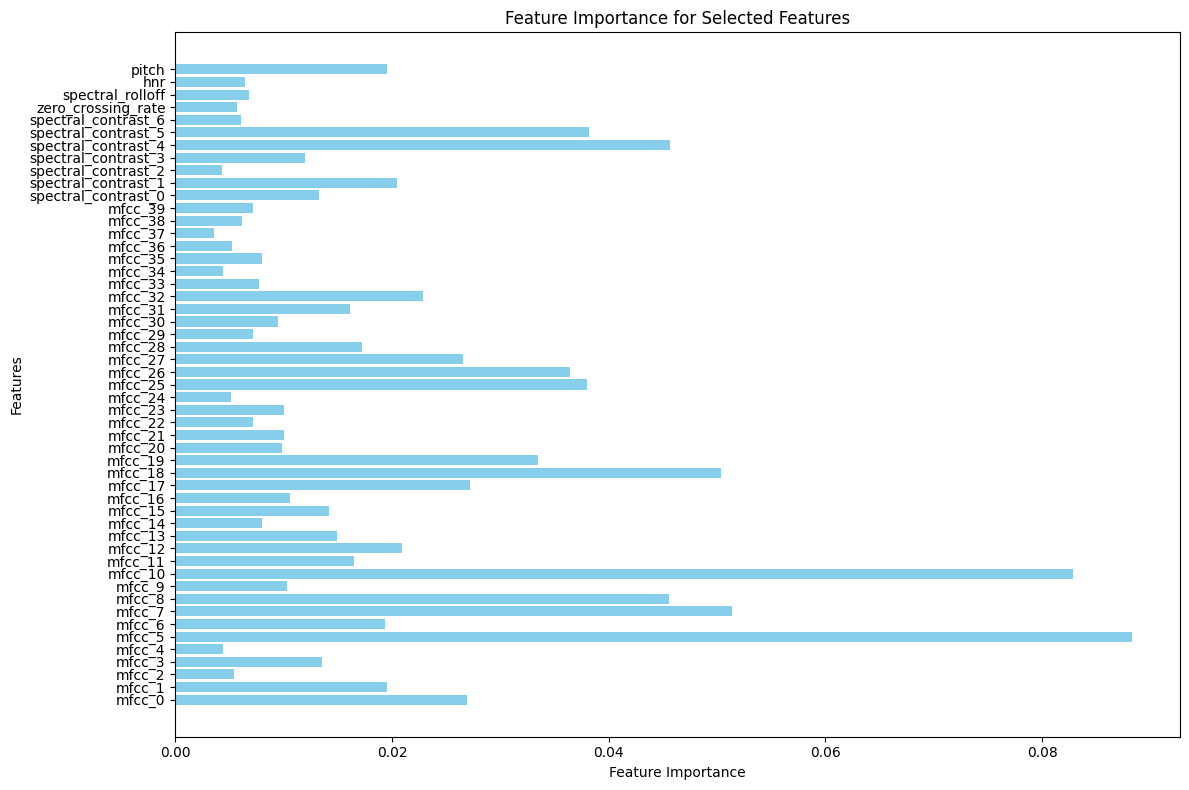

In [ ]:
import matplotlib.pyplot as plt

# Ekstraksi fitur dengan kombinasi tetap
selected_features = ["mfcc", "spectral_contrast", "zero_crossing_rate", "spectral_rolloff", "hnr", "pitch"]
X_combined = []

for index, row in df.iterrows():
    file_path = row['file_path']
    audio_data, sampling_rate = librosa.load(file_path, sr=None)
    features = extract_features(audio_data, sampling_rate, selected_features)
    X_combined.append(features)

X_combined = np.array(X_combined)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy with selected features: {accuracy:.2f}")

# Feature importance
importances = model.feature_importances_

# Membuat nama fitur
feature_names = []

# Tambahkan fitur dari setiap jenis
if "mfcc" in selected_features:
    feature_names.extend([f"mfcc_{i}" for i in range(40)])  # MFCC memiliki 40 koefisien
if "spectral_contrast" in selected_features:
    feature_names.extend([f"spectral_contrast_{i}" for i in range(7)])  # Spectral contrast memiliki 7 band
if "zero_crossing_rate" in selected_features:
    feature_names.append("zero_crossing_rate")
if "spectral_rolloff" in selected_features:
    feature_names.append("spectral_rolloff")
if "hnr" in selected_features:
    feature_names.append("hnr")
if "pitch" in selected_features:
    feature_names.append("pitch")

# Visualisasi feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Selected Features')
plt.tight_layout()
plt.show()


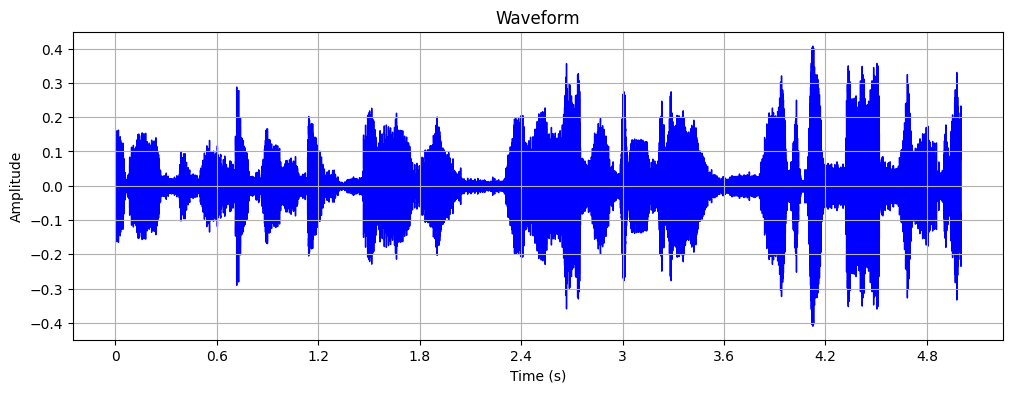

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Load salah satu file audio dari dataset
file_path = df.iloc[0]['file_path']  # Ganti sesuai file yang ingin divisualisasikan
audio_data, sampling_rate = librosa.load(file_path, sr=None)

# Plot waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_data, sr=sampling_rate, color='blue')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


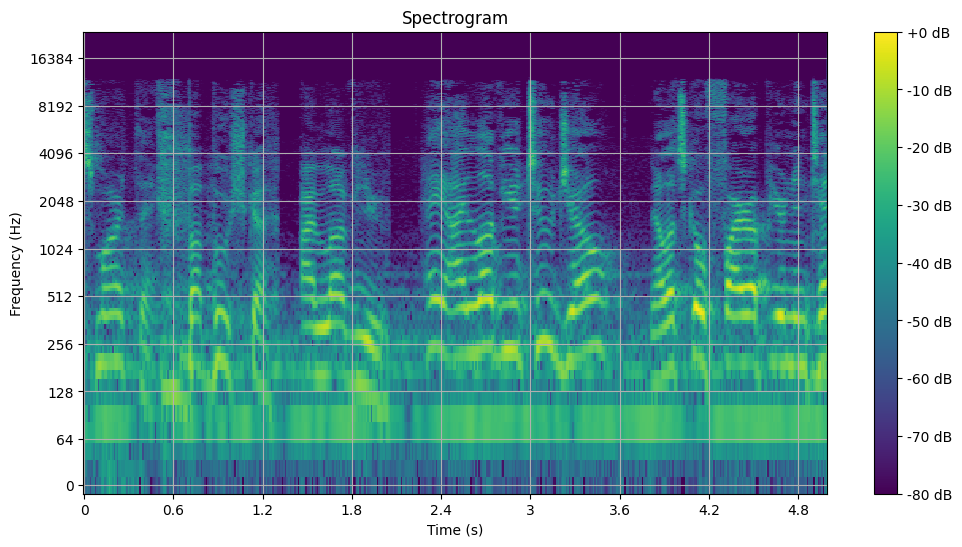

In [ ]:
# Compute the spectrogram
S = librosa.stft(audio_data)
S_dB = librosa.amplitude_to_db(np.abs(S), ref=np.max)

# Plot spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_dB, sr=sampling_rate, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.show()
